In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

import requests
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

651

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | khash
Processing Record 4 of Set 1 | cayenne
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | ipameri
Processing Record 13 of Set 1 | mao
Processing Record 14 of Set 1 | chicama
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | labuhan
Processing Record 19 of Set 1 | krasnyy yar
Processing Record 20 of Set 1 | erenhot
Processing Record 21 of Set 1 | pacific grove
Processing Record 22 of Set 1 | kavieng


Processing Record 41 of Set 4 | dolores
Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | san borja
Processing Record 44 of Set 4 | burdur
Processing Record 45 of Set 4 | bagdarin
Processing Record 46 of Set 4 | potosi
Processing Record 47 of Set 4 | kassala
Processing Record 48 of Set 4 | port elizabeth
Processing Record 49 of Set 4 | marsh harbour
Processing Record 50 of Set 4 | sonepur
Processing Record 1 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 5 | kande
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | leningradskiy
Processing Record 5 of Set 5 | leh
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | luwuk
Processing Record 8 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 9 of Set 5 | nikki
Processing Record 10 of Set 5 | mahebourg
Processing Record 11 of Set 5 | khatanga
Processing Record 12 of Set 5 | hambantota
Processing Record 13 of Set 5 | menongue

Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | ust-omchug
Processing Record 37 of Set 8 | jonava
Processing Record 38 of Set 8 | mormugao
Processing Record 39 of Set 8 | prince rupert
Processing Record 40 of Set 8 | nabire
Processing Record 41 of Set 8 | hastings
Processing Record 42 of Set 8 | montepuez
Processing Record 43 of Set 8 | silver city
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | raudeberg
Processing Record 46 of Set 8 | chokurdakh
Processing Record 47 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 8 | college
Processing Record 49 of Set 8 | karpathos
Processing Record 50 of Set 8 | provideniya
Processing Record 1 of Set 9 | abu kamal
Processing Record 2 of Set 9 | nizhniy tsasuchey
Processing Record 3 of Set 9 | cairns
Processing Record 4 of Set 9 | lodja
Processing Record 5 of Set 9 | balykshi
City not found. Skipping...
Processing Record 6 of Set 9 | saint-georges
Processing Record 7

Processing Record 22 of Set 12 | cestas
Processing Record 23 of Set 12 | saleaula
City not found. Skipping...
Processing Record 24 of Set 12 | rorvik
Processing Record 25 of Set 12 | barcelos
Processing Record 26 of Set 12 | liverpool
Processing Record 27 of Set 12 | merauke
Processing Record 28 of Set 12 | comodoro rivadavia
Processing Record 29 of Set 12 | afyonkarahisar
Processing Record 30 of Set 12 | kiunga
Processing Record 31 of Set 12 | grand gaube
Processing Record 32 of Set 12 | gibraleon
Processing Record 33 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 34 of Set 12 | susehri
Processing Record 35 of Set 12 | miquelon
Processing Record 36 of Set 12 | tsabong
Processing Record 37 of Set 12 | bezhetsk
Processing Record 38 of Set 12 | severo-kurilsk
Processing Record 39 of Set 12 | karpogory
Processing Record 40 of Set 12 | nouakchott
Processing Record 41 of Set 12 | san matias
Processing Record 42 of Set 12 | stornoway
Processing Record 43 of Set 12 | mea

In [13]:
len(city_data)

603

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.36,55.77,69.80,64,44,11.41,RE,2020-07-09 01:57:41
1,Bengkulu,-3.80,102.27,79.05,77,100,1.88,ID,2020-07-09 01:57:41
2,Khash,28.22,61.22,76.71,20,10,3.65,IR,2020-07-09 01:57:41
3,Cayenne,4.93,-52.33,77.00,100,97,3.27,GF,2020-07-09 01:55:21
4,Bredasdorp,-34.53,20.04,44.60,81,100,3.36,ZA,2020-07-09 01:57:41
5,Puerto Ayora,-0.74,-90.35,68.00,94,65,1.01,EC,2020-07-09 01:57:15
6,Busselton,-33.65,115.33,53.01,82,12,4.43,AU,2020-07-09 01:57:42
7,Saint George,37.10,-113.58,100.40,4,1,12.75,US,2020-07-09 01:55:21
8,Punta Arenas,-53.15,-70.92,28.40,92,19,11.41,CL,2020-07-09 01:57:35
9,Ushuaia,-54.80,-68.30,39.20,64,75,4.70,AR,2020-07-09 01:57:42


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2020-07-09 01:57:41,-21.36,55.77,69.80,64,44,11.41
1,Bengkulu,ID,2020-07-09 01:57:41,-3.80,102.27,79.05,77,100,1.88
2,Khash,IR,2020-07-09 01:57:41,28.22,61.22,76.71,20,10,3.65
3,Cayenne,GF,2020-07-09 01:55:21,4.93,-52.33,77.00,100,97,3.27
4,Bredasdorp,ZA,2020-07-09 01:57:41,-34.53,20.04,44.60,81,100,3.36


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594261453.5305321

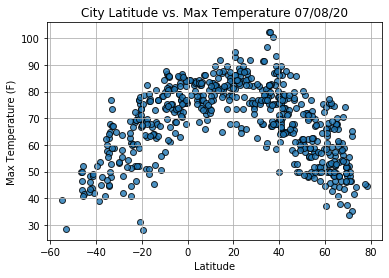

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

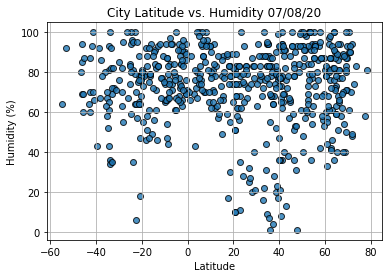

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

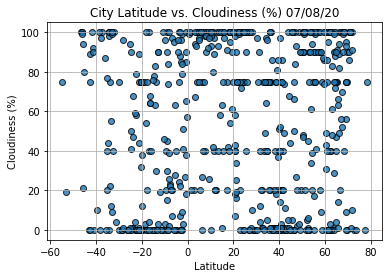

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

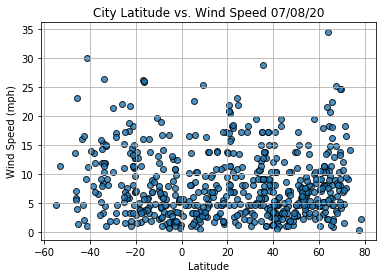

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()